# Inferring phospho peptides

In the following we will use AlphaQuant's proteoform analysis and combine it with deep learning predictions that give a probability how prone a certain peptide sequence is to phosphorylation. We use the combination of those two to predict phorphorylated proteoforms.

As with the standard differential expression analysis, we need:

* an input file from a proteomics search engine. We support most common search engines. Specifications on input files are given in our [README](https://github.com/MannLabs/alphaquant/blob/master/README.md#preparing-input-files).
* a sample mapping file that maps each sample to a condition (e.g.  sample 'brain_replicate_1' is mapped to condition 'brain').
* (optional) a results directory can be defined on where to save the data
* (optional) a list where we specify, which conditions we compare

Additionally, we need to specify, wether we want to perform 




In [1]:
INPUT_FILE = "./data/phospho/proteome_subset.tsv"
SAMPLEMAP_FILE = "./data/phospho/samplemap_proteome.tsv"
RESULTS_DIRECTORY = "./data/phospho/results_phospho_inference"

CONDPAIRS_LIST = [("egf_treated", "untreated")] #this means each fc is egf_treated/untreated


In [2]:
import alphaquant.run_pipeline as aq_pipeline

aq_pipeline.run_pipeline(input_file=INPUT_FILE, samplemap_file=SAMPLEMAP_FILE, results_dir=RESULTS_DIRECTORY, condpairs_list=CONDPAIRS_LIST, organism="human", perform_phospho_inference=True, cluster_threshold_pval=0.01, take_median_ion=False)

using input type spectronaut_fragion_isotopes
removed pre existing /Users/constantin/workspace/alphaquant/example_nbs/data/phospho/proteome_subset.tsv.ml_info_table.tsv
start processeing condpair ('egf_treated', 'untreated')
normalized within conditions
median 0.3736080582187675, mode 0.49142721072130446
using mode for shift
shift comparison by -0.49142721072130446
normalized between conditions
t_ion2nonan_sw 0.010523080825805664
t_intensity_selection 0.16688919067382812
t_ion2nonan_sw 0.010534286499023438
t_intensity_selection 0.1609489917755127
checked 0 of 4178 ions
checked 2000 of 4178 ions
checked 4000 of 4178 ions
checked 0 of 30 prots

condition pair ('egf_treated', 'untreated') finished!



In [3]:
import pandas as pd

proteoform_df = pd.read_csv(RESULTS_DIRECTORY + "/egf_treated_VS_untreated.proteoforms.tsv", sep='\t')
display(proteoform_df)

,protein,proteoform_id,cluster,is_reference,peptides,num_peptides,quality_score,log2fc,fraction_of_peptides,likely_phospho,fcdiff
0,CBL,CBL_0,0,True,SEQ_RPLPCTPGDCPSR_;SEQ_AASGSLHK_;SEQ_MYEENSQPR...,16,0.131016,-0.109065,1.00,False,0.000000
1,CDC42,CDC42_0,0,True,SEQ_QKPITPETAEK_;SEQ_TPFLLVGTQIDLR_;SEQ_NVFDEA...,6,0.532086,-0.098313,0.75,False,0.000000
2,CDC42,CDC42_1,1,False,SEQ_WVPEITHHCPK_,1,0.425134,0.569118,0.12,False,0.667431
3,CDC42,CDC42_2,2,False,SEQ_YVECSALTQK_,1,0.077540,-0.828220,0.12,True,0.729908
4,CDC7,CDC7_0,0,True,SEQ_ITAEEALLHPFFK_;SEQ_FVQSEAQQER_;SEQ_HLIPTSH...,8,0.131016,0.018931,1.00,False,0.000000
5,COMMD2,COMMD2_0,0,True,SEQ_LHLNQNGDHNTK_;SEQ_MLLELSEEHK_;SEQ_EHLAFLPQ...,5,0.233512,-0.252832,1.00,True,0.000000
6,DHX34,DHX34_0,0,True,SEQ_HSIPALADLPR_;SEQ_AGPAPPGASDGVDIQDVK_;SEQ_A...,22,0.157754,-0.111619,1.00,False,0.000000
7,EGFR,EGFR_0,0,True,SEQ_YSFGATCVK_;SEQ_GDSFTHTPPLDPQELDILK_;SEQ_AC...,28,0.344920,-0.126423,0.70,False,0.000000
8,EGFR,EGFR_1,1,False,SEQ_GSTAENAEYLR_;SEQ_NLCYANTINWK_;SEQ_GSHQISLD...,4,0.237968,-0.625511,0.10,True,0.499088
9,EGFR,EGFR_2,2,False,SEQ_GPDNCIQCAHYIDGPHCVK_;SEQ_LTQLGTFEDHFLSLQR_...,5,0.164439,0.575683,0.12,False,0.702106


In [4]:
import alphaquant.utils.diffquant_utils as aq_diffquant_utils

proteoform_df_filtered = aq_diffquant_utils.filter_proteoform_df(proteoform_df=proteoform_df, min_num_peptides=1, fcdiff_cutoff=0, likely_phospho=True, keep_reference_proteoform=True)
display(proteoform_df_filtered)

,protein,proteoform_id,cluster,is_reference,peptides,num_peptides,quality_score,log2fc,fraction_of_peptides,likely_phospho,fcdiff
3,CDC42,CDC42_2,2,False,SEQ_YVECSALTQK_,1,0.077540,-0.828220,0.12,True,0.729908
8,EGFR,EGFR_1,1,False,SEQ_GSTAENAEYLR_;SEQ_NLCYANTINWK_;SEQ_GSHQISLD...,4,0.237968,-0.625511,0.10,True,0.499088
10,EGFR,EGFR_3,3,False,SEQ_ELVEPLTPSGEAPNQALLR_;SEQ_TPLLSSLSATSNNSTVA...,3,0.050802,-1.600968,0.07,True,1.474545
37,RTCB,RTCB_1,1,False,SEQ_GMAAAGNYAWVNR_;SEQ_SYNDELQFLEK_;SEQ_QIGNVA...,9,0.237968,-0.340988,0.38,True,0.573969
38,RTCB,RTCB_2,2,False,SEQ_LVMEEAPESYK_,1,0.211230,-0.849219,0.04,True,1.082200
46,USP8,USP8_1,1,False,SEQ_YVTVYNLIK_;SEQ_ELYLSSSLK_;SEQ_SDVSPIIQPVPS...,9,0.157754,-0.524906,0.26,True,0.563978
48,ZFPL1,ZFPL1_1,1,False,SEQ_DDDRTPGLHGDCDDDK_;SEQ_LCNIPLASR_,2,0.014037,-0.738886,0.33,True,0.870010
1,CDC42,CDC42_0,0,True,SEQ_QKPITPETAEK_;SEQ_TPFLLVGTQIDLR_;SEQ_NVFDEA...,6,0.532086,-0.098313,0.75,False,0.000000
7,EGFR,EGFR_0,0,True,SEQ_YSFGATCVK_;SEQ_GDSFTHTPPLDPQELDILK_;SEQ_AC...,28,0.344920,-0.126423,0.70,False,0.000000
36,RTCB,RTCB_0,0,True,SEQ_GLGHQVATDALVAMEK_;SEQ_LMFEELR_;SEQ_GVIPMNA...,14,0.477273,0.232981,0.58,True,0.000000


CDC42


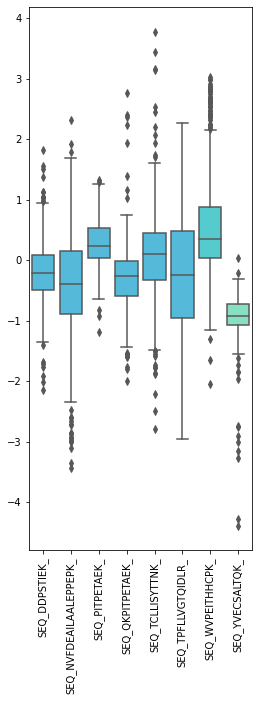

EGFR


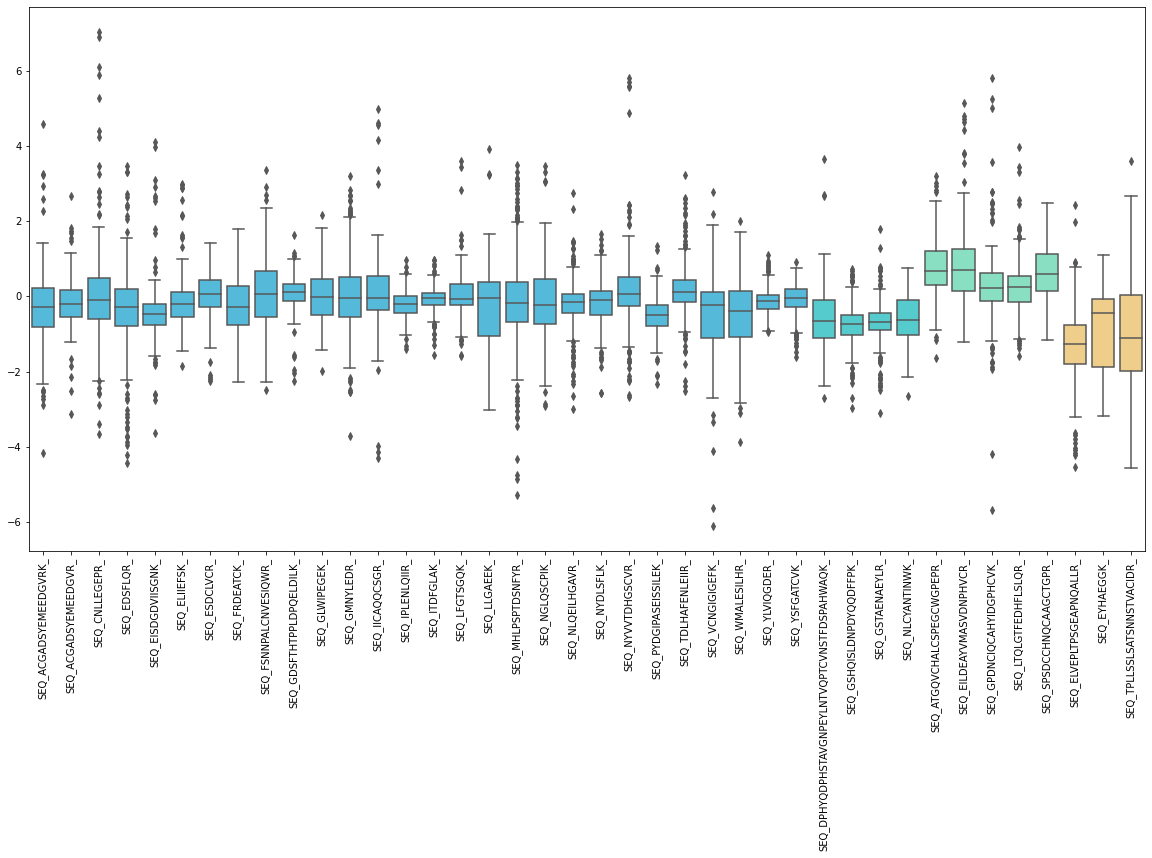

RTCB


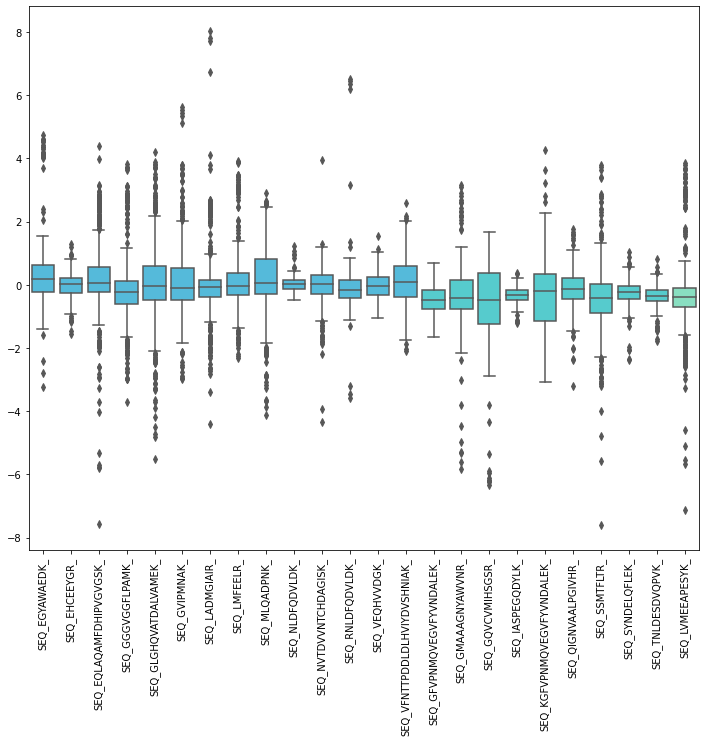

USP8


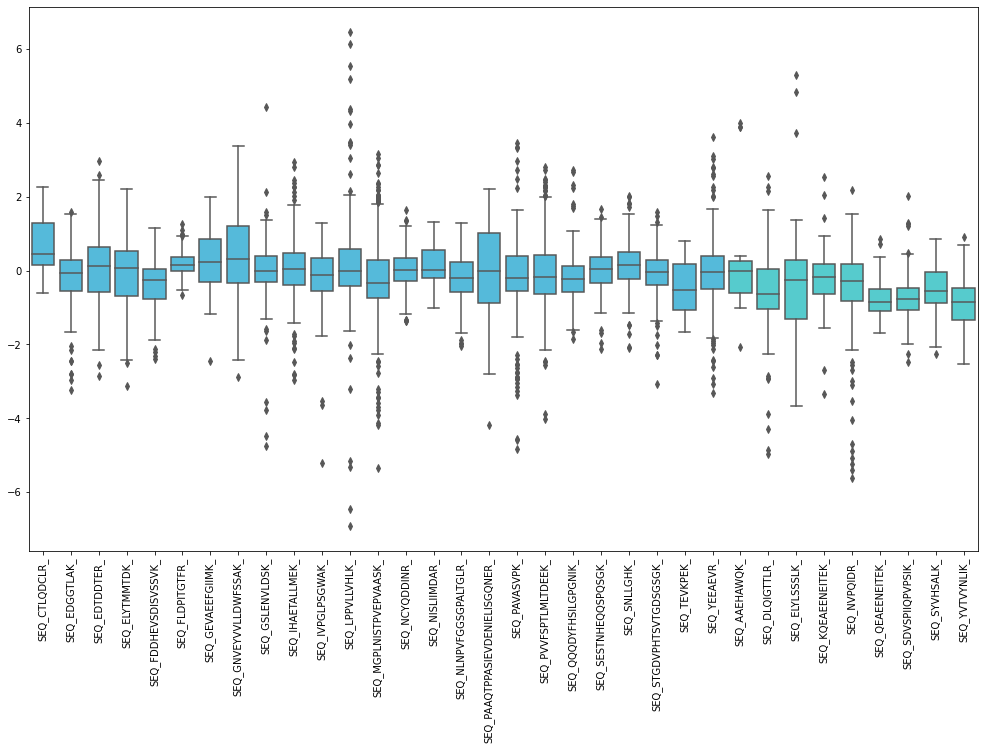

ZFPL1


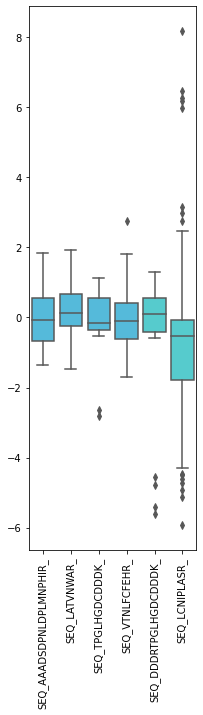

In [5]:
import alphaquant.plotting.fcviz as aq_fcviz
import alphaquant.plotting.base_functions as aq_base_functions
import alphaquant.utils.utils as aq_utils

plotconfig = aq_fcviz.PlotConfig()
plotconfig.colorlist = aq_base_functions.AlphaPeptColorMap().colorlist #change the colorlist to the AlphaPept colorlist, not necessary

quantification_info = aq_fcviz.CondpairQuantificationInfo(("egf_treated", "untreated"), RESULTS_DIRECTORY, SAMPLEMAP_FILE)

#load the trees containing the tree-based quantification info
condpair_tree = aq_utils.read_condpair_tree("egf_treated", "untreated", results_folder=RESULTS_DIRECTORY)


protein2node = {x.name : x for x in condpair_tree.children}
for protein_of_interest in proteoform_df_filtered['protein'].unique():
    print(protein_of_interest)
    protein_node = protein2node[protein_of_interest]
    cluster_plotter = aq_fcviz.FCPlotter(protein_node, quantification_info, plotconfig)
